In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np


In [55]:

# Suppose you have a list of filenames and corresponding categories
files_and_categories = {
    '/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Paper_1/Results/Model_summary/model_all_df.csv': 'All Data',
    '/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Paper_1/Results/Model_summary/model_labeled_df.csv': 'Sampled',
    '/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Paper_1/Results/Model_summary/model_dup_df.csv': 'Duplicate',
    '/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Paper_1/Results/Model_summary/model_mc_df.csv': 'Merge Conflict',
    '/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Paper_1/Results/Model_summary/model_nc_df.csv': 'No Comment',
    '/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Paper_1/Results/Model_summary/model_nr_df.csv': 'No Reason',
    '/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Paper_1/Results/Model_summary/model_qua_df.csv': 'Quality',
    '/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Paper_1/Results/Model_summary/model_rep_df.csv': 'Replaced',
    '/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Paper_1/Results/Model_summary/model_res_df.csv': 'Resolved',
    '/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Paper_1/Results/Model_summary/model_sta_df.csv': 'Stale',
    '/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Paper_1/Results/Model_summary/model_suc_df.csv': 'Successful',
    '/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Paper_1/Results/Model_summary/model_unn_df.csv': 'Unnecessary',
}

# Initialize an empty DataFrame
combined_df = pd.DataFrame()
df_list = []
# Loop through the dictionary and process each file
for file, category in files_and_categories.items():
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    df['Category'] = category
    df_list.append(df)

# Concatenate the DataFrames into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True)


In [59]:
#remove the rows where the term is intercept
combined_df = combined_df[combined_df.term != '(Intercept)']
#remove the rows where the term is code_changes_counts
combined_df = combined_df[combined_df.term != 'code_changes_counts']
combined_df = combined_df[combined_df.term != 'repo_pr_tenure_mnth']
combined_df = combined_df[combined_df.term != 'prs_experience']
combined_df = combined_df[combined_df.term != 'prs_tenure_mnth']
combined_df = combined_df[combined_df.term != 'prs_succ_rate']
combined_df = combined_df[combined_df.term != 'perc_external_contribs']

In [60]:

combined_df.head(20)

,Estimate,Std. Error,z value,Pr(>|z|),odds_ratio,term,Significance,Category
1,0.902699,0.003949,228.592393,0.000000e+00,2.466250,comments_counts,***,All Data
2,0.037278,0.005317,7.011751,2.353536e-12,1.037982,commit_counts,***,All Data
6,-0.072309,0.005475,-13.206013,8.100226e-40,0.930243,prs_popularity,***,All Data
7,-0.160776,0.008601,-18.692218,5.728135e-78,0.851483,prs_watched_repo1,***,All Data
9,-0.247107,0.036602,-6.751160,1.466673e-11,0.781057,prs_main_team_member1,***,All Data
11,-0.127116,0.011753,-10.815492,2.907295e-27,0.880631,prs_followed_pri1,***,All Data
12,-0.005064,0.011509,-0.440020,6.599228e-01,0.994949,repo_pr_popularity,,All Data
13,-0.027405,0.011611,-2.360217,1.826423e-02,0.972967,repo_pr_team_size,*,All Data
15,-0.146301,0.018854,-7.759545,8.523431e-15,0.863898,intra_branch1,***,All Data
16,-1.301206,0.037834,-34.392564,3.257073e-259,0.272203,pr_files_changed1,***,All Data


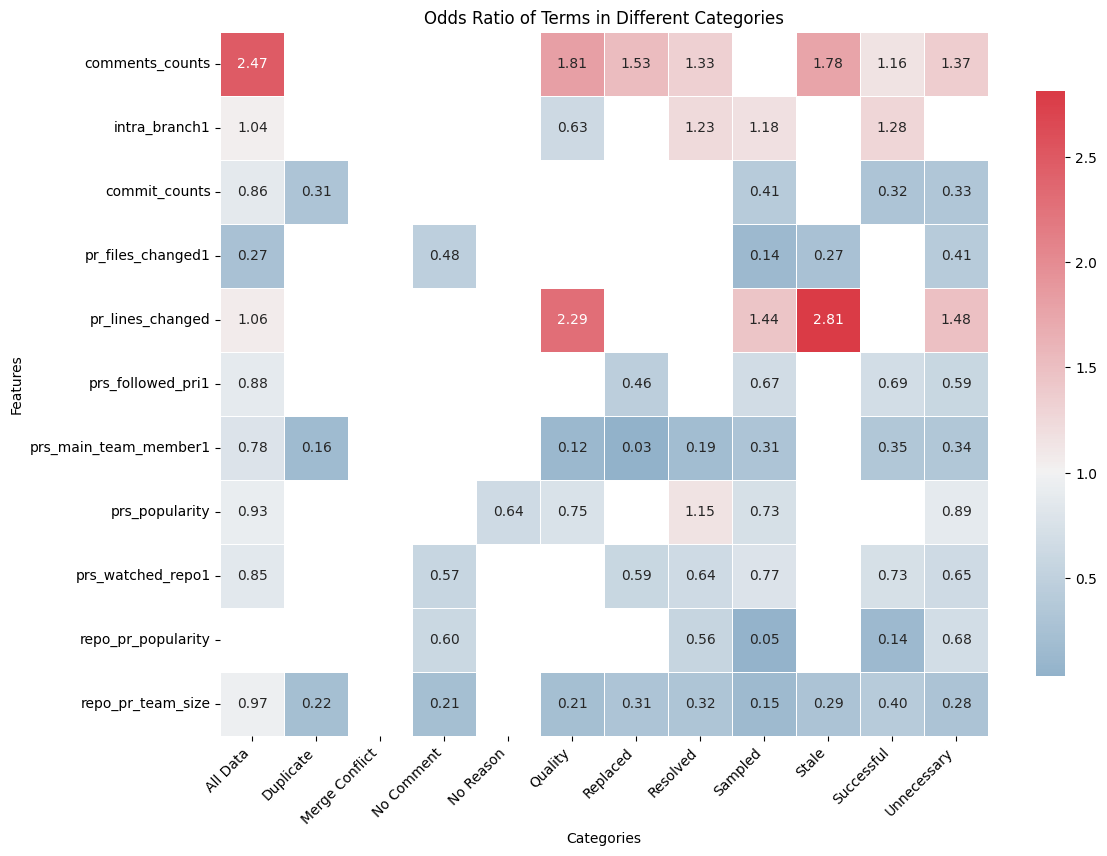

In [61]:
# Now, pivot the combined DataFrame
heatmap_data = combined_df.pivot_table(index='term', columns='Category', values='odds_ratio')

# Create a mask for the significance, where True means non-significant
significance_mask = combined_df.pivot(index='term', columns='Category', values='Significance').applymap(
    lambda x: x not in ['*', '**', '***'])


cmap = sns.diverging_palette(240, 10, as_cmap=True)



# Create the heatmap
plt.figure(figsize=(12, 12))  # Adjust the size as needed
sns.heatmap(heatmap_data,mask= significance_mask, cmap=cmap, center=1.0, annot=True, fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .5}, square=True)

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha='right')
plt.setp(plt.gca().get_yticklabels(), rotation=0)

# For the black cells where the significance is not *, **, or ***
# for i in range(significance_mask.shape[0]):
#     for j in range(significance_mask.shape[1]):
#         if significance_mask.iat[i, j]:
#             plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=3))
#change the labels
#change the position of the category sampled to second
labels = [item.get_text() for item in plt.gca().get_yticklabels()]
labels[1], labels[2] = labels[2], labels[1]
plt.gca().set_yticklabels(labels)
plt.ylabel('Features')
plt.xlabel('Categories')
plt.title('Odds Ratio of Terms in Different Categories')
# Adjust the plot as necessary
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

